In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("inter_choco_rating.csv")
df.head()

,rating,cocoa_perc,CQ,sweetness,acidity,bitterness,roast,intensity,complexity,structure,...,mouthfeel,flavor,quality,bitter_cocoa,sweet_cocoa,sweet_bitter,flavor_quality,flavor_compl,quality_struc,quality_comple
0,2.5,65.0,57.0,55.0,48.0,37.0,62.0,51.0,43.0,41.0,...,72.0,81.4,83.0,2405.0,3575.0,2035.0,6756.2,3500.2,3403.0,3569.0
1,4.0,75.0,53.0,42.0,40.0,49.0,71.0,37.0,36.0,80.0,...,85.3,88.4,86.5,3675.0,3150.0,2058.0,7646.6,3182.4,6920.0,3114.0
2,3.5,75.0,44.0,48.0,76.0,50.0,63.0,45.0,52.0,39.0,...,82.0,86.4,87.0,3750.0,3600.0,2400.0,7516.8,4492.8,3393.0,4524.0
3,4.0,65.0,60.0,56.0,76.0,20.0,68.0,64.0,62.0,83.0,...,90.7,89.0,90.0,1300.0,3640.0,1120.0,8010.0,5518.0,7470.0,5580.0
4,3.5,85.0,23.0,21.0,8.0,70.0,76.0,52.0,10.0,78.0,...,83.3,84.2,82.5,5950.0,1785.0,1470.0,6946.5,842.0,6435.0,825.0


In [3]:
#create a training sample of 80% of our data
df_train = df.sample(frac=0.8, random_state=5)
#test sample of 20% of our data
df_test = df.drop(df_train.index, axis=0)

In [4]:
#seperate training
y_train = df_train['rating']
x_train = df_train.iloc[:,1:]
#seperate testing
y_test = df_train['rating']
x_test = df_train.iloc[:,1:]

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using 

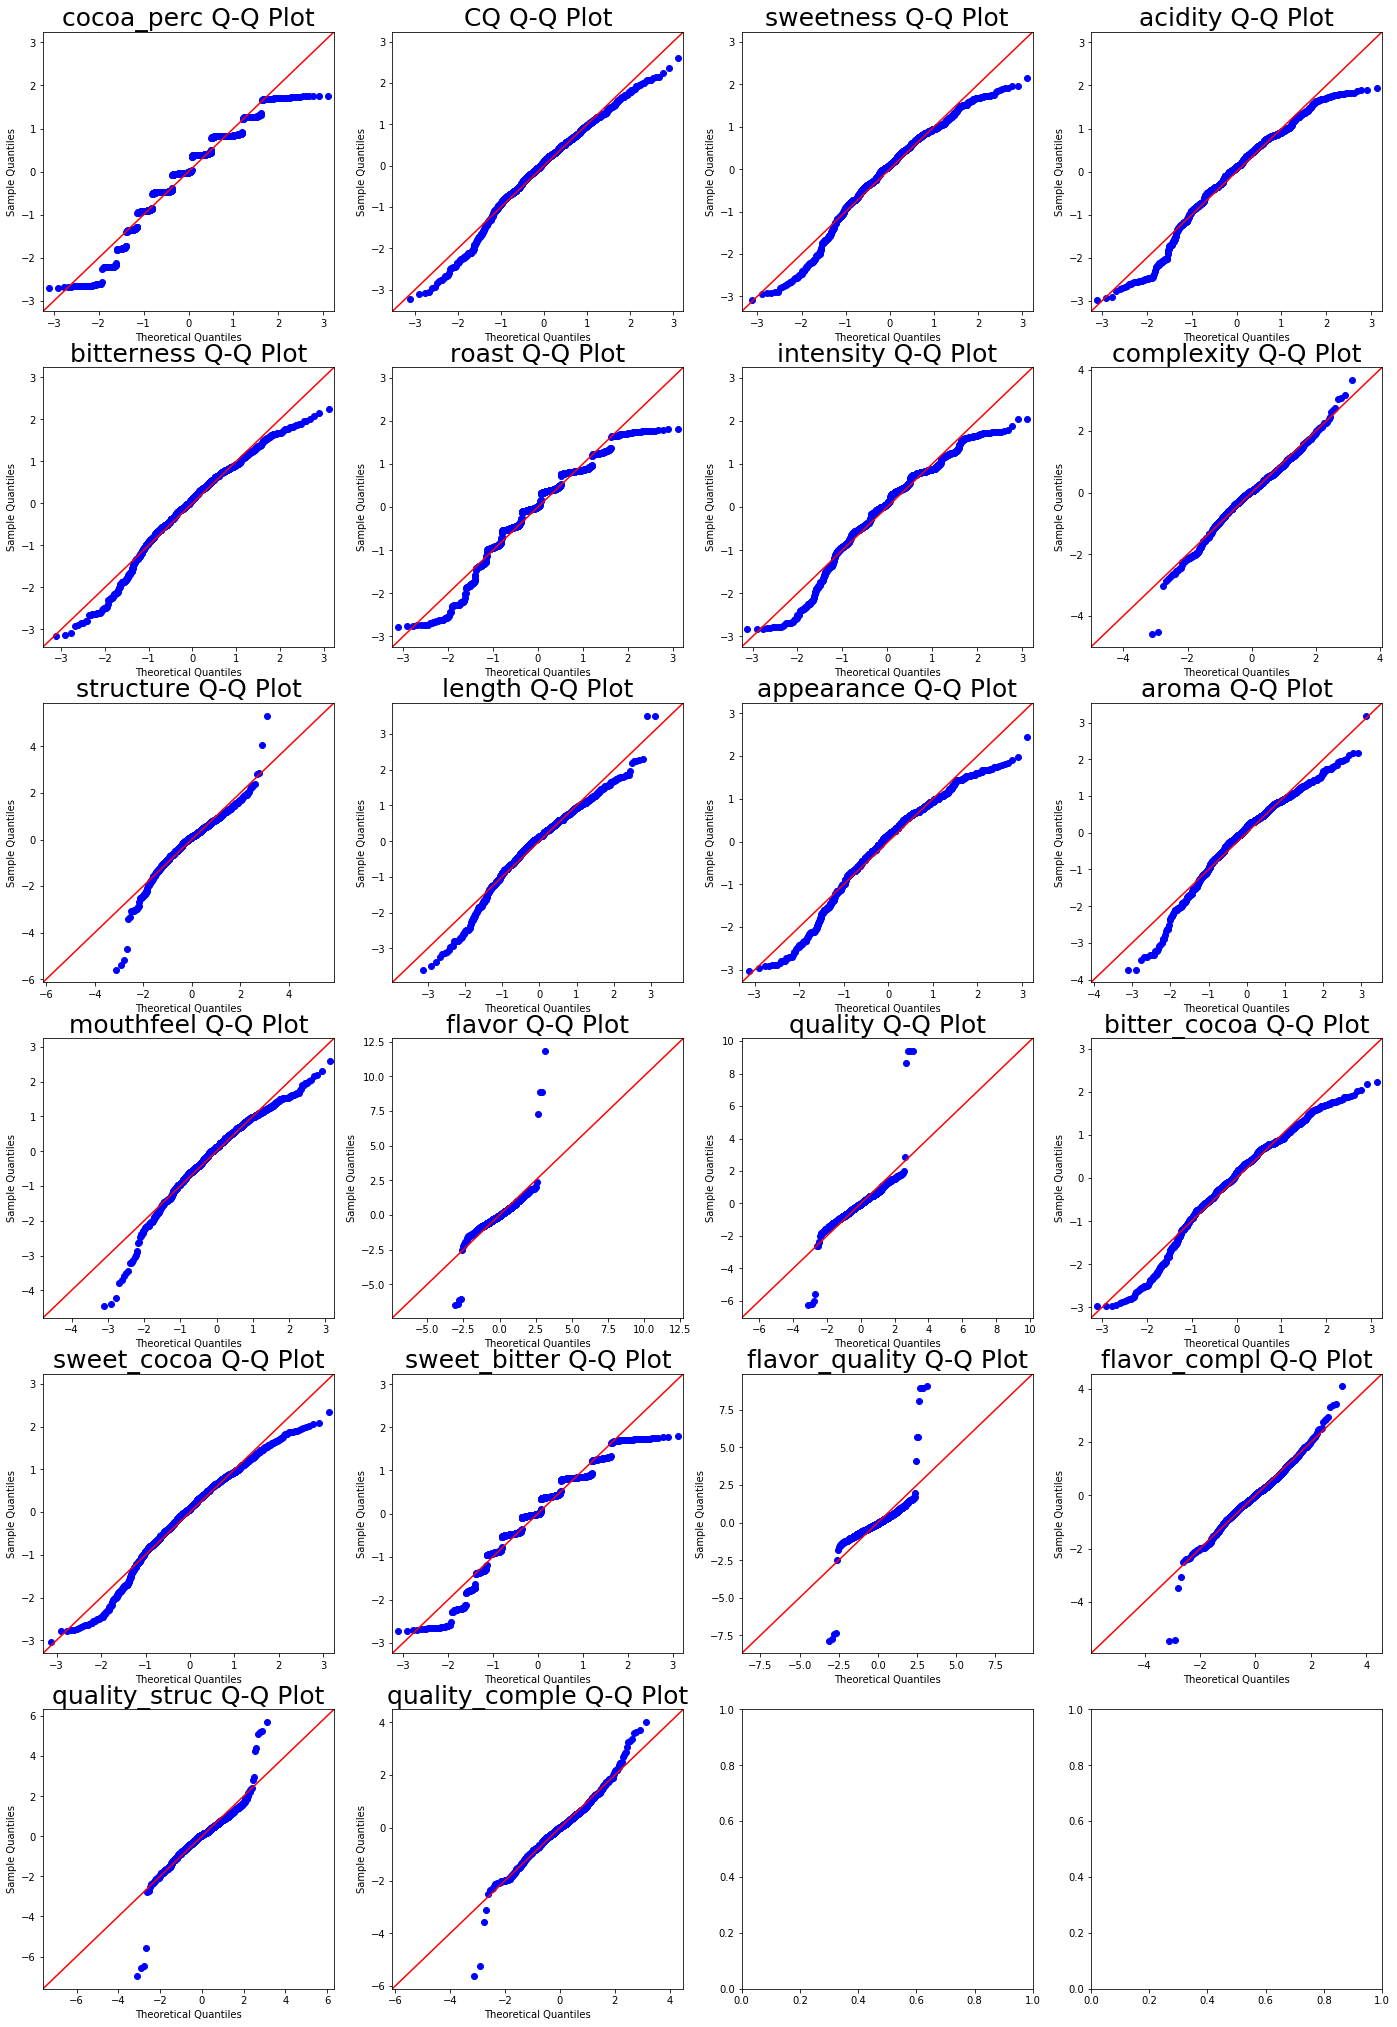

In [5]:
fig, ax = plt.subplots(6, 4, figsize = (24, 36))

for col, ax in zip(x_train.columns, fig.axes):
    f = 'rating~' + str(col)
    single_model = ols(formula=f, data=df_train).fit()
    resid = single_model.resid
    ax.set_title('{} Q-Q Plot'.format(col), fontsize=25)
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True, ax=ax)
    fig.show();

In [6]:
#model
df_sm = sm.add_constant(x_train)
results = sm.OLS(y_train, df_sm).fit()
results.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     396.0
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:22:09   Log-Likelihood:                -495.05
No. Observations:                1094   AIC:                             1036.
Df Residuals:                    1071   BIC:                             1151.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.0406      0.433     -4.717      0.000      -2.889      -1.192
cocoa_perc         0.0050      0.004      1.138      0.255      -0.004       0.014
CQ                 0.0019      0.001      2.699      0.007       0.001       0.003
sweetness          0.0035      0.004      0.977      0.329      -0.003       0.010
acidity            0.0010      0.001      1.439      0.151      -0.000       0.002
bitterness         0.0066      0.005      1.274      0.203      -0.004       0.017
roast           9.125e-05      0.001      0.121      0.903      -0.001       0.002
intensity         -0.0013      0.001     -1.542      0.123      -0.003       0.000
complexity        -0.0272      0.005     -4.981      0.000      -0.038      -0.016
structure         -0.0034      0.004     -0.877      0.381      -0.011       0.004
length            -0.0009      0.001     -0.865      0.387      -0.003       0.001
appearance         0.0063      0.001      6.637      0.000       0.004       0.008
aroma              0.0112      0.001      9.194      0.000       0.009       0.014
mouthfeel          0.0163      0.001     11.624      0.000       0.014       0.019
flavor            -0.0347      0.005     -6.416      0.000      -0.045      -0.024
quality            0.0177      0.004      4.744      0.000       0.010       0.025
bitter_cocoa   -7.863e-05   5.64e-05     -1.394      0.164      -0.000     3.2e-05
sweet_cocoa    -2.787e-05    5.1e-05     -0.547      0.585      -0.000    7.22e-05
sweet_bitter    1.709e-07    4.1e-05      0.004      0.997   -8.02e-05    8.05e-05
flavor_quality     0.0005   6.57e-05      6.905      0.000       0.000       0.001
flavor_compl       0.0011   6.69e-05     16.182      0.000       0.001       0.001
quality_struc   9.228e-05   4.85e-05      1.902      0.057   -2.92e-06       0.000
quality_comple    -0.0008   5.52e-05    -13.682      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     1195.259   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           213534.289
Skew:                          -4.921   Prob(JB):                         0.00
Kurtosis:                      70.732   Cond. No.                     4.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We drop the following variables because they are not significant as a predictor based on the p-value:
- cocoa_perc
- sweetness
- acidity 
- bitterness 
- roast
- intensity
- structure
- length
- bitter_cocoa
- sweet_cocoa
- sweet_bitter


In [7]:
not_sig_cols = ['cocoa_perc', 'sweetness', 'acidity', 'bitterness', 'roast', 'intensity', 
                'structure', 'length', 'bitter_cocoa', 'sweet_cocoa', 'sweet_bitter']
#drop the columns for our train data
x_train = x_train.drop(not_sig_cols, axis=1)
#drop the columns for our test data
x_test = x_test.drop(not_sig_cols, axis=1)

In [8]:
x_train.head()

,CQ,complexity,appearance,aroma,mouthfeel,flavor,quality,flavor_quality,flavor_compl,quality_struc,quality_comple
748,28.0,14.0,78.0,81.0,82.0,86.4,79.5,6868.8,1209.6,2146.5,1113.0
754,64.0,22.0,74.0,71.0,86.0,86.0,78.5,6751.0,1892.0,3454.0,1727.0
1076,53.0,31.0,96.0,64.0,66.0,72.0,69.5,5004.0,2232.0,3614.0,2154.5
1351,43.0,41.0,88.0,89.0,94.0,91.6,93.5,8564.6,3755.6,8415.0,3833.5
912,32.0,31.0,86.0,81.0,90.0,82.8,77.5,6417.0,2566.8,4960.0,2402.5


In [9]:
#create model
df_sm = sm.add_constant(x_train)
results = sm.OLS(y_train, df_sm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     787.7
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:22:09   Log-Likelihood:                -502.63
No. Observations:                1094   AIC:                             1029.
Df Residuals:                    1082   BIC:                             1089.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.6366      0.251     -6.518      0.000      -2.129      -1.144
CQ                 0.0023      0.001      3.527      0.000       0.001       0.004
complexity        -0.0281      0.005     -5.255      0.000      -0.039      -0.018
appearance         0.0060      0.001      6.388      0.000       0.004       0.008
aroma              0.0112      0.001      9.335      0.000       0.009       0.014
mouthfeel          0.0161      0.001     11.650      0.000       0.013       0.019
flavor            -0.0365      0.005     -7.519      0.000      -0.046      -0.027
quality            0.0183      0.004      5.127      0.000       0.011       0.025
flavor_quality     0.0005   5.65e-05      8.333      0.000       0.000       0.001
flavor_compl       0.0011   6.53e-05     16.511      0.000       0.001       0.001
quality_struc   4.364e-05   1.08e-05      4.059      0.000    2.25e-05    6.47e-05
quality_comple    -0.0007   5.24e-05    -14.068      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     1196.626   Durbin-Watson:                   2.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           214948.244
Skew:                          -4.929   Prob(JB):                         0.00
Kurtosis:                      70.958   Cond. No.                     2.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#before = 0.891
#result = 0.889

## model our prediction

In [11]:
conn = "+".join(list(x_train.columns))
f = 'rating~' + conn
model = ols(formula=f, data=df_train).fit()

### see how well our model does

In [12]:
#predict
y_pred = model.predict(x_train)

In [31]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


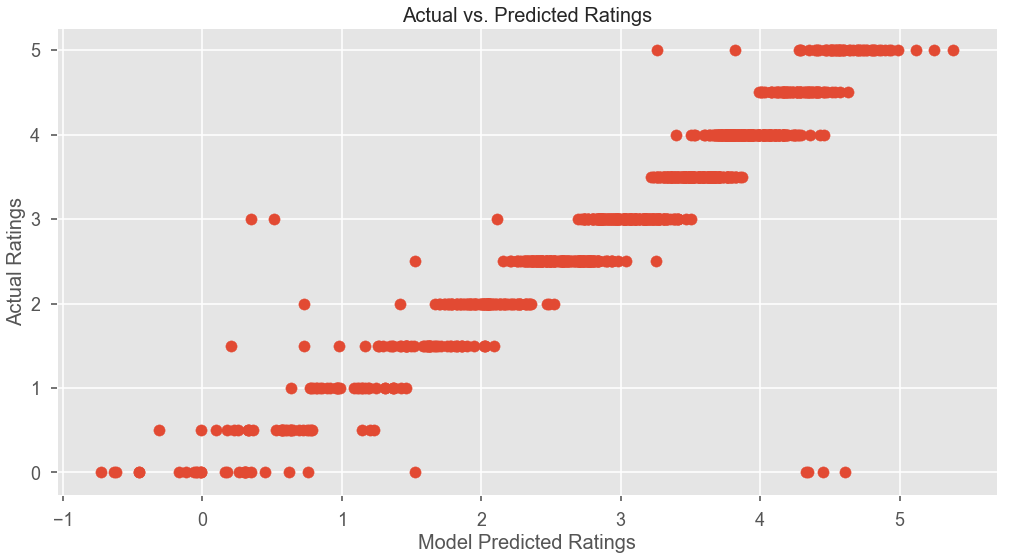

In [48]:
#compare with the actual values
plt.figure(figsize=(15,8))
plt.style.use('ggplot')

plt.scatter(y_pred, y_train)
plt.xlabel('Model Predicted Ratings', size=20)
plt.xticks(size=18)
plt.ylabel('Actual Ratings', size=20)
plt.yticks(size=18)
plt.title('Actual vs. Predicted Ratings', size=20)
plt.show()

There are negative rating prediction values which is clearly wrong. 

In [17]:
#get the variance of the two
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_train)
mse 

0.14675587336298718

In [18]:
#Root Mean Squared Error
rmse = np.sqrt(mse)
rmse 

0.38308729209279074